4, 7, 9

# Question 1

the difference between Simple Linear Regression and Multiple Linear Regression; and the benefit the latter provides over the former?

    A simple linear regression is simple. It has one slope, for one variable. It takes the form of a line, a mathematical concept most common people are familar with. A multiple linear regression is more complicated as it uses multiple predictors and multiple outcomes, which allows for more informative results to statisticians, but it is harder to understand by nonstatisticians.

the difference between using a continuous variable and an indicator variable in Simple Linear Regression; and these two linear forms? 

    A continuous variable changes as a quantity changes, regardless of certain criterea. A indicator variable turns off and on based on whether or not the input meets the criterea. In this way, both affect the shape of the regression but in different ways.

the change that happens in the behavior of the model (i.e., the expected nature of the data it models) when a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression; and these two linear forms (i.e., the Simple Linear Regression versus the Multiple Linear Regression)?

    Instead of a single line to predict a single variable for all data, multiple lines are used to predict certain groups of data.

the effect of adding an interaction between a continuous and an indicator variable in Multiple Linear Regression models; and this linear form?

    An interaction allows for different categories to have different slopes, not just different intercepts. This allows an interaction between the slope part of the continuous variable and the on/offness of the indicator variable. Often this change allows for better prediction of the data if the variables are believed to be dependent.

the behavior of a Multiple Linear Regression model (i.e., the expected nature of the data it models) based only on indicator variables derived from a non-binary categorical variable; this linear form; and the necessarily resulting binary variable encodings it utilizes?

    A multiple linear regression only equipped with a single indicator variable will result in a constant functions with values of the average of each group. Being a nonbinary variable there will be more than two group, but for any given variable it is either in the group or not in the group, so it still a binary operation.
    
https://chatgpt.com/c/67361953-1704-8011-8aa0-b966648976dc

# Question 2

In this scenario we are predicting the estimated effectiveness of the advertising based on the spending on TV and online ads. Without interaction, the model will create two separate slopes for each continuous variable that add together to get a predicted value. With interaction the model will create a three slopes, one for each variable and one that is the product of two. If we replaced the continuous variables with "high" and "low" categories, our models would be the following: the model will create two indicator variables that add together to get a predicted value. If we used a indicator variable interaction, then we would have three indicator terms, one for one category, one for another, and one for both.
https://chatgpt.com/c/67361953-1704-8011-8aa0-b966648976dc

# Question 3

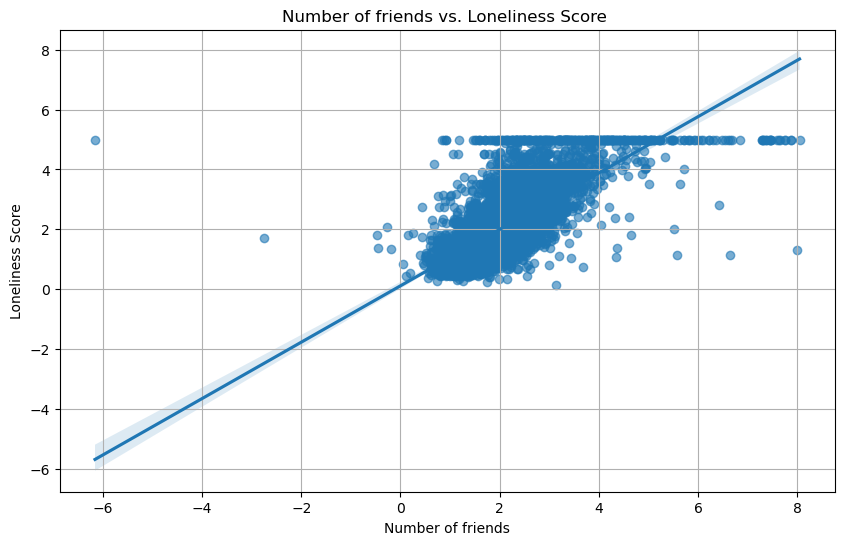

In [1]:
# Import necessary libraries
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the at dataset
california = fetch_california_housing(as_frame=True)
data = california.frame

# Inspect the data to choose relevant features
#print(data.head())

# Define the regression formula (predicting MedHouseVal based on multiple features)
formula = 'MedHouseVal ~ MedInc + HouseAge + AveRooms + AveOccup + AveBedrms'

# Split the data into training and test sets for validation purposes
train_data, test_data = train_test_split(data, test_size=0.3, random_state=0)

# Fit the regression model on the training data
model = smf.ols(formula=formula, data=train_data).fit()

# Print the model summary
#print(model.summary())

# Plotting the regression results for the test data
plt.figure(figsize=(10, 6))
sns.regplot(x=model.predict(test_data), y=test_data['MedHouseVal'], scatter_kws={'alpha':0.6})
plt.title('Number of friends vs. Loneliness Score ')
plt.xlabel('Number of friends')
plt.ylabel('Loneliness Score')
plt.grid(True)
plt.show()


https://chatgpt.com/c/67361953-1704-8011-8aa0-b966648976dc

# Question 4*

When there is strong evidence against the null hypothesis of no correlation, that means that the variable in question likely has an effect on the predicted value. The important distinction is that this variable may not be the only variable that effects the outcome. In other words, a low p-value of a certain predictor variable is not synonymous to completely explaining the variation, even if we are looking at only one variable in our model. In this way, there may be strong evidence against the null hypothesis for a variable that only explains 17.6% of the data. These statements are not contridictory, because they can, and often do coexist.

https://chatgpt.com/c/67361953-1704-8011-8aa0-b966648976dc

In [2]:
import pandas as pd
import statsmodels.formula.api as smf

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        03:30:04   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Question 5

Code Snippet 1:

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


This code fills NAs, then puts the results into a module called SKLearn to randomly split the data to minimize bias.

Code Snippet 2:


In [4]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        03:30:04   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This code makes a linear regression model to predict health points based on attack and defense of the Pokemon in pokeaman_train group.

Code Snippet 3:

In [5]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


This code prints out the R-squared for both pokeaman_test (out of sample) and pokeaman_train (in sample) for model3.
Code snippet 4:

In [6]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Fri, 15 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        03:30:04   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

This code sets up a new linear model, one with interactions between attack, defense, legendary status, and speed, and prints the results.

Code snippet 5:

In [7]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


This code prints out the R-squared for both pokeaman_test (out of sample) and pokeaman_train (in sample) for model4.

https://chatgpt.com/c/67361953-1704-8011-8aa0-b966648976dc

# Question 6

Predictor variables and their respective outcomes are stored in "design matrix", an array. Multicollinearity means that the predictors themselves are correlated, meaning the model cannot effectively tell which variable from a group of very similar variables are making the difference. This means that these variable's coefficients can be pretty much anything as long as they  cancel out to the right value in the end. This also makes the model "overfitted" to the sample data set but ill-equipped for other samples.

https://chatgpt.com/c/67361953-1704-8011-8aa0-b966648976dc

# Question 7*




In [8]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
# model5_fit.summary()

yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP

Model 5 extends the idea of model 3 by keeping the variables seperate (no interactions) and extends the idea of model 4 by reusing the same predict variables and then adding a couple categorical ones.

In [9]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
#model6_fit.summary()

yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP

Model 6 refines the regression of model 5, removing the predictor variables with terribly high p-values. For example the p-value of defense in model 5, was .87, so it can be discarded. This makes our model more understandable because we don't have to look at so many variables.

In [10]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
#model7_fit.summary()

yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP

Model 7 refines the regression by adding interactions to closely linked variables like attack, speed, special attack, special defense to reduce multicollinearity, improving its predictive accuracy.

https://chatgpt.com/c/67361953-1704-8011-8aa0-b966648976dc

# Question 8

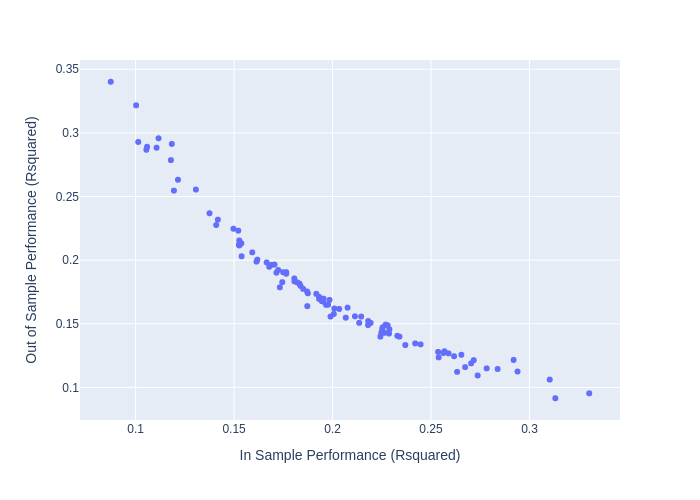

In [11]:
import plotly.express as px 
import plotly.graph_objects as go
# etc.

linear_form = 'HP ~ Attack + Defense'
   
reps = 100
in_sample_Rsquared = np.array([0.0]*reps)
out_of_sample_Rsquared = np.array([0.0]*reps)
for i in range(reps):
    songs_training_data,songs_testing_data = train_test_split(pokeaman, train_size=fifty_fifty_split_size)
    final_model_fit = smf.ols(formula=linear_form, 
                              data=songs_training_data).fit()
    in_sample_Rsquared[i] = final_model_fit.rsquared
    out_of_sample_Rsquared[i] = \
      np.corrcoef(songs_testing_data.HP, 
                  final_model_fit.predict(songs_testing_data))[0,1]**2
    
df = pd.DataFrame({"In Sample Performance (Rsquared)": in_sample_Rsquared,
                   "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared})   
fig = px.scatter(df, x="In Sample Performance (Rsquared)", 
                     y="Out of Sample Performance (Rsquared)")
fig.show(renderer="png")

My guess is this activity was to explore the relationship between the two r-squared values. The graph shows a clear inversely proportion relationship, suggesting the better the performance in sample the worse out of sample and vice versa. This makes sense because a high r-squared suggests overfitting, which results in low r-squared out of sample. Likewise, a low r-squared suggests underfitting, allowing for a higher r-squared out of sample.

https://chatgpt.com/c/67361953-1704-8011-8aa0-b966648976dc

# Question 9*

In [12]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")


model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")



model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)
'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)
'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)
'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (ge

We are departing from analyzing current pokemon stats and trying to predict the next generation. For both models the complete data set was able to predict gen 6 better than the one without gen 6, which makes sense. But the difference between them is more pronouced in model 7 than model 6. This can be attributed to its higher complexity, which we have learned can often lead to overfitting. As a whole, this activity hammers home the idea that simpler models are better than complex ones with slightly better in-sample r-squared values for most statistical applications, especially those that involve predicting the future.

https://chatgpt.com/c/67361953-1704-8011-8aa0-b966648976dc